<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/analysis/eda_microsoft_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Microsoft (MSFT) Stock Price Data

The first step for any machine learning project is pre-processing the data, which can involve a range of steps based on the problem statement. In this notebook I demonstrate some of those pre-processing techniques.

The dataset (MSFT.csv) used here contains the data related to Microsoft stock data (source: Yahoo! Finance) from the year 3/13/1986 to 7/30/2018.

### Imports and theme

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import norm
import seaborn as sns

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d",
    "light": "#fefeff", "stone": "#8f8f94",
    "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3",
    "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

### Load the data

In [ ]:
df = pd.read_csv("MSFT.csv")

### Understand the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8163 non-null   object 
 1   Open       8163 non-null   float64
 2   High       8163 non-null   float64
 3   Low        8163 non-null   float64
 4   Close      8163 non-null   float64
 5   Adj Close  8163 non-null   float64
 6   Volume     8163 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 446.5+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.071132,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.073673,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.074943,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.073038,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.071768,47894400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8.163000e+03
mean,23.961199,24.225893,23.697838,23.966033,20.013666,6.193038e+07
std,20.410153,20.594311,20.216426,20.412222,19.356876,3.904020e+07
min,0.088542,0.092014,0.088542,0.090278,0.066052,2.304000e+06
25%,2.904297,2.945313,2.871094,2.908203,2.127781,3.856800e+07
50%,25.815001,26.110001,25.540001,25.809999,19.678543,5.504460e+07
75%,31.615001,32.045000,31.214374,31.678750,25.176462,7.540815e+07
max,110.739998,111.150002,109.500000,110.830002,110.830002,1.031789e+09


The MSFT dataset lists the trading record for Microsoft (MSFT) stock, from its IPO on 13 March 1986, up to 30 July 2018.

There are 8,163 entries in total.

Each entry lists the date of trading, open and closing prices, high and low prices, adjusted closing price, and volume of trading - the number of shares bought and sold on each day.

### Clean the data (handle missing data and outliers)

First, let's check for missing values:

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values for any of the entries.

Next, we can examine potential outliers.

An outlier that stuck out from the df.head() call above related to trading volume: MSFT held its IPO on 13 March 1986, on which date the trading volume reached 1,031,788,800 (around 1 billion share transactions).

In [ ]:
df["Volume"].nlargest(3)

0       1031788800
754      788688000
2081     764504000
Name: Volume, dtype: int64

In [ ]:
df.iloc[754]["Date"]

'1989-03-07'

In [ ]:
df.iloc[2081]["Date"]

'1994-06-06'

For comparison, the next two highest trading volumes were 788,688,000 (788.69 million) and 764,504,000 (764.5 million) shares, which took place on 7 March 1989 and 6 June 1994, respectively.

Microsoft posted strong earnings results around those dates, and also announced the launch of Microsoft Office and Windows 1995, respectively, which likely explains the surge in trading volumes.

Recall that in total, there are 8,163 trading records in the dataset. Of these, 844 (10.3%) had trading volumes above 100 million, but then just 69 (0.85%) were above 200 million.

Let's look at how extreme the three highest values are.

In [ ]:
IPO_std = ((df["Volume"].max() - df["Volume"].mean().round()) / df["Volume"].std())
print(f"IPO date trading volume standard deviations from the mean: {IPO_std:,.2f}")

IPO date trading volume standard deviations from the mean: 24.84


In [ ]:
mar_7_89 = (df.iloc[754]["Volume"] - df["Volume"].mean().round()) / df["Volume"].std()
print(f"7 March 1989 trading volume standard deviations from the mean: {mar_7_89:,.2f}")

7 March 1989 trading volume standard deviations from the mean: 18.62


In [ ]:
jun_6_94 = (df.iloc[2081]["Volume"] - df["Volume"].mean().round()) / df["Volume"].std()
print(f"6 June 1994 trading volume standard deviations from the mean: {jun_6_94:,.2f}")

6 June 1994 trading volume standard deviations from the mean: 18.00


The IPO date trading volume is a significant outlier, but it is expected that trading volumes at IPO will be uncharacteristically large, since it is rare for such a large proportion of a company's shares to be exchanged in a single day. Since IPOs are an important part of the "story" of a stock, I won't exclude it on that basis. Also, this datapoint naturally occurs at the start of the record, and should not cause undue distortion for trend analysis.

For now we will just note these outliers, and keep the data intact.

The other value of interest is the adjusted close price - these figures make the trading history for the shares directly comparable across inflation, dividends, and stock splits, so it is preferable to review this versus the original open and close prices. Let's quickly examine the statistical profile for that variable.

In [ ]:
df["Adj Close"].describe()

count    8163.000000
mean       20.013666
std        19.356876
min         0.066052
25%         2.127781
50%        19.678543
75%        25.176462
max       110.830002
Name: Adj Close, dtype: float64

In [ ]:
min_adj_dev = (df["Adj Close"].min() - df["Adj Close"].mean().round()) / df["Adj Close"].std()
print(f"Minimum Adj Close standard deviations from the mean: {min_adj_dev:,.2f}")

Minimum Adj Close standard deviations from the mean: -1.03


In [ ]:
max_adj_dev = (df["Adj Close"].max() - df["Adj Close"].mean().round()) / df["Adj Close"].std()
print(f"Maximum Adj Close standard deviations from the mean: {max_adj_dev:,.2f}")

Maximum Adj Close standard deviations from the mean: 4.69


From these figures we can see that the maximum adjusted close price for the dataset, USD110.83, deviates from the mean significantly, at 4.69 standard deviations.

This at first appears alarming, until we consider that we are reviewing time series data, and not a normal distribution around a fixed mean. Microsoft has been one of the most successful companies of the past several decades; our data relates to over 30 years of MSFT trading history, so we expect significant growth within that interval.

### Remove unused features

For now we are interested in only the dates, adjusted close prices, and trading volume from the initial dataset, so let's create a copy of the dataframe with just these values.

In [ ]:
df_new = df[["Date", "Adj Close", "Volume"]].copy()

In [ ]:
df_new.head()

,Date,Adj Close,Volume
0,1986-03-13,0.071132,1031788800
1,1986-03-14,0.073673,308160000
2,1986-03-17,0.074943,133171200
3,1986-03-18,0.073038,67766400
4,1986-03-19,0.071768,47894400


### Create new features from existing data

Additions to the data that would assist understanding, are the daily changes in adjusted close and trading volume. We can add columns from the second entry onwards to capture the real and percentage changes based on the previous day. (For obvious reasons, we can't do this for the first day of trading.)

In [ ]:
df_new["Adj Close %Δ"] = df_new["Adj Close"].pct_change()
df_new["Volume %Δ"] = df_new["Volume"].pct_change()
new_order = ["Date", "Adj Close", "Adj Close %Δ", "Volume", "Volume %Δ"]
df_new = df_new[new_order]

In [ ]:
df_new.head()

,Date,Adj Close,Adj Close %Δ,Volume,Volume %Δ
0,1986-03-13,0.071132,NaN,1031788800,NaN
1,1986-03-14,0.073673,0.035722,308160000,-0.701334
2,1986-03-17,0.074943,0.017238,133171200,-0.567850
3,1986-03-18,0.073038,-0.025419,67766400,-0.491133
4,1986-03-19,0.071768,-0.017388,47894400,-0.293243


In [ ]:
df_new.describe()

,Adj Close,Adj Close %Δ,Volume,Volume %Δ
count,8163.000000,8162.000000,8.163000e+03,8162.000000
mean,20.013666,0.001128,6.193038e+07,0.103741
std,19.356876,0.021540,3.904020e+07,0.654860
min,0.066052,-0.301160,2.304000e+06,-0.938394
25%,2.127781,-0.009322,3.856800e+07,-0.210931
50%,19.678543,0.000117,5.504460e+07,-0.011927
75%,25.176462,0.011374,7.540815e+07,0.250740
max,110.830002,0.195652,1.031789e+09,14.594150


From these intial descriptions we can see that the largest daily decrease and increase in MSFT share prices were approximately -30.1% and +19.6%, respectively.

The trading volume changes of the largest magnitude were a 93.8% decrease, and 1459.4%(!) increase based on the previous day of trading. We will return to these figures later to examine significant shifts in the data.

We are dealing with time series data, so let's add columns relating to time periods for later use.

In [ ]:
df_new["Date"] = pd.to_datetime(df_new["Date"])
df_new["Quarter"] = df_new["Date"].dt.to_period("Q")
df_new["Year"] = df_new["Date"].dt.year
df_new.head()

,Date,Adj Close,Adj Close %Δ,Volume,Volume %Δ,Quarter,Year
0,1986-03-13,0.071132,NaN,1031788800,NaN,1986Q1,1986
1,1986-03-14,0.073673,0.035722,308160000,-0.701334,1986Q1,1986
2,1986-03-17,0.074943,0.017238,133171200,-0.567850,1986Q1,1986
3,1986-03-18,0.073038,-0.025419,67766400,-0.491133,1986Q1,1986
4,1986-03-19,0.071768,-0.017388,47894400,-0.293243,1986Q1,1986


### Exploratory Analysis

Now we can review some of the trends exhibited by the dataset.

In [ ]:
def create_line_plot(ax, data, x, y, color, xticks, legend=True, title=False, xlabel=False, ylabel=False, ymean=False, axlines=False):

    sns.lineplot(data=data, x=x, y=y, color=linecolor, legend=legend)

    title = title or x
    plt.title(title, fontdict={"size": 12, "color": palette["stone"]})

    xlabel = xlabel or x
    ylabel = ylabel or y
    plt.xlabel(xlabel, fontsize=12, color=palette["stone"])
    plt.ylabel(ylabel, fontsize=12, color=palette["stone"])
    plt.xticks(xticks, fontsize=12, color=palette["stone"], rotation=45, ha="center")
    plt.yticks(fontsize=12, color=palette["stone"])

    if ymean:
        plt.axhline(data[y].mean(), color=palette["stone"], linestyle="--", label="Mean")

    if axlines:
        for axline in axlines:
            ax.axhline(axline[0], color=palette["stone"], linestyle=':', label=axline[1])

    # Remove ticks from x and y axes (left and bottom)
    plt.tick_params(left=False, bottom=False)
    sns.despine()
    if legend:
        plt.legend(fontsize=10, labelcolor=palette["light"], frameon=False)
    plt.grid()



In [ ]:
meanQ_vols = df_new.groupby(["Quarter"])["Volume"].mean().reset_index()
meanQ_vols["Volume"] = meanQ_vols["Volume"] / 1000000
meanQ_vols["Quarter"] = meanQ_vols["Quarter"].astype(str)
meanQ_ac = df_new.groupby(["Quarter"])["Adj Close"].mean().reset_index()
meanQ_ac["Quarter"] = meanQ_ac["Quarter"].astype(str)

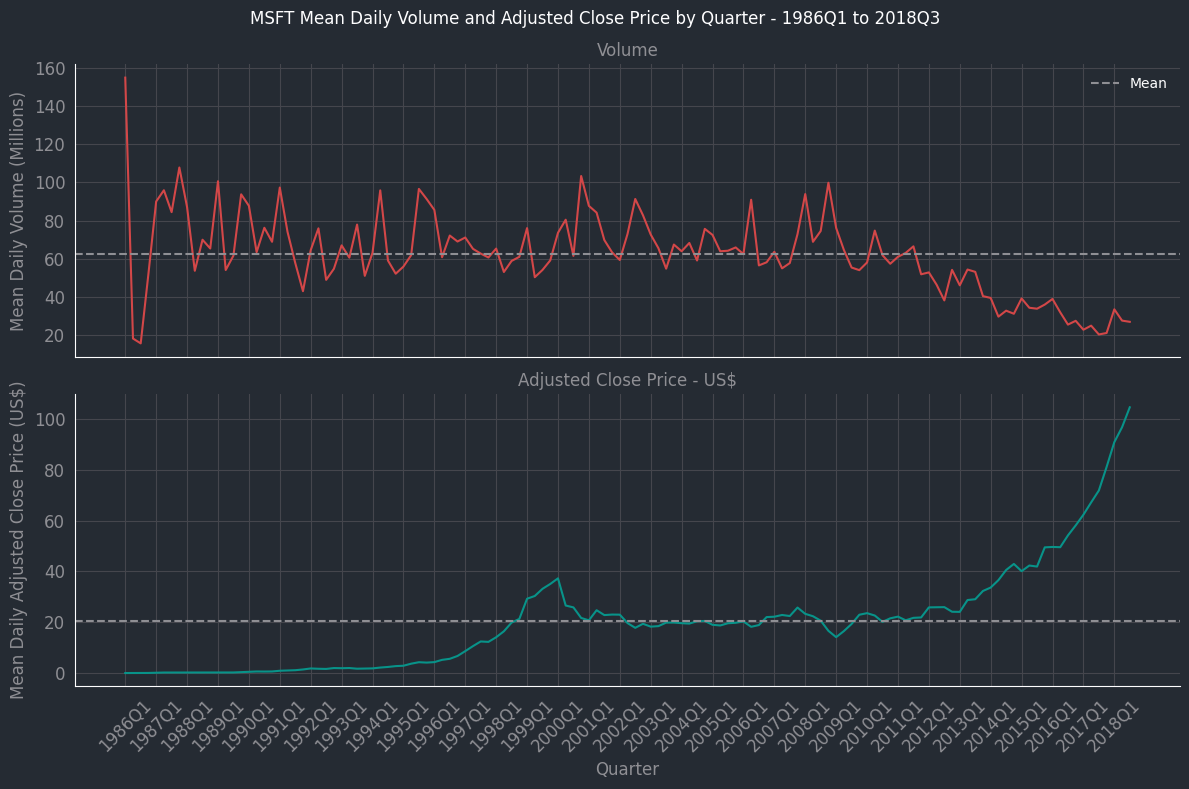

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
title = plt.suptitle("MSFT Mean Daily Volume and Adjusted Close Price by Quarter - 1986Q1 to 2018Q3", color=palette["light"])

ax1 = plt.subplot(2, 1, 1)
linecolor = palette["red"]
xticks = meanQ_vols["Quarter"].unique()[::4]
yaxis = "Volume"
ylabel = "Mean Daily Volume (Millions)"
create_line_plot(ax1, meanQ_vols, "Quarter", yaxis, linecolor, xticks, title=yaxis, ylabel=ylabel, ymean=True)

ax2 = plt.subplot(2, 1, 2)
linecolor = palette["green"]
yaxis = "Adj Close"
ylabel = "Mean Daily Adjusted Close Price (US$)"
title = "Adjusted Close Price - US$"
create_line_plot(ax2, meanQ_ac, "Quarter", yaxis, linecolor, xticks, legend=False, title=title, ylabel=ylabel, ymean=True)

plt.tight_layout()
plt.show()

We can observe some interesting trends from this data.

First, let's take a closer look at the trading volumes.

In [ ]:
# Get masks for time periods
start_1986Q1, end_2008Q3 = "1986Q1", "2008Q3"
mask_1986Q1_to_2008Q3 = (meanQ_vols["Quarter"] >= start_1986Q1) & (meanQ_vols["Quarter"] <= end_2008Q3)
start_2008Q4, end_2018Q3 = "2008Q4", "2018Q3"
mask_2008Q4_to_2018Q3 = (meanQ_vols["Quarter"] >= start_2008Q4) & (meanQ_vols["Quarter"] <= end_2018Q3)
start_2014Q4 = "2014Q4"
mask_2014Q4_to_2018Q3 = (meanQ_vols["Quarter"] >= start_2014Q4) & (meanQ_vols["Quarter"] <= end_2018Q3)
# Apply masks to obtain means
mean_1986Q1_to_2008Q3 = meanQ_vols.loc[mask_1986Q1_to_2008Q3, "Volume"].mean()
mean_2008Q4_to_2018Q3 = meanQ_vols.loc[mask_2008Q4_to_2018Q3, "Volume"].mean()
mean_2014Q4_to_2018Q3 = meanQ_vols.loc[mask_2014Q4_to_2018Q3, "Volume"].mean()

print(f"1986Q1-2008Q3 daily mean volume per quarter: {mean_1986Q1_to_2008Q3:.2f} million shares")
print(f"2008Q4-2018Q3 daily mean volume per quarter: {mean_2008Q4_to_2018Q3:.2f} million shares")
print(f"2014Q4-2018Q3 daily mean volume per quarter: {mean_2014Q4_to_2018Q3:.2f} million shares")

1986Q1-2008Q3 daily mean volume per quarter: 69.86 million shares
2008Q4-2018Q3 daily mean volume per quarter: 45.28 million shares
2014Q4-2018Q3 daily mean volume per quarter: 29.85 million shares


Daily trading volume fluctuated around a mean of 70.19 million shares between the March 1986 IPO and Q4 2008.

Since that time, the mean volume has steadily decreased, with a mean of 43.88 million shares for the last decade of the dataset. For the final five years of the data, the mean stood at just 29.85.

One explanation for this trend is Microsoft's establishment over time as a bluechip technology stock.  Microsoft is regarded as a secure investment, and is attractive to institutional investors (insurers, pension funds, etc) seeking to hold over the long-term. According to NASDAQ data available on 17 November 2023, for example, institutional ownership of publicly traded MSFT shares stood at around 70.63% (source: https://www.nasdaq.com/market-activity/stocks/msft/institutional-holdings).

Another possible explanation (though not mutually exclusive with the above) is the volume of shares in issue; if Microsoft had embarked on a policy of share buy-backs following the 2008 financial crisis, for example, this would have reduced the aggregate volume of shares available for trading. This hypothesis could be explored through analysis of Microsoft's annual reports and beneficial ownership information.

Now let's turn to the mean adjusted close price figures, recharted below for ease of reference.

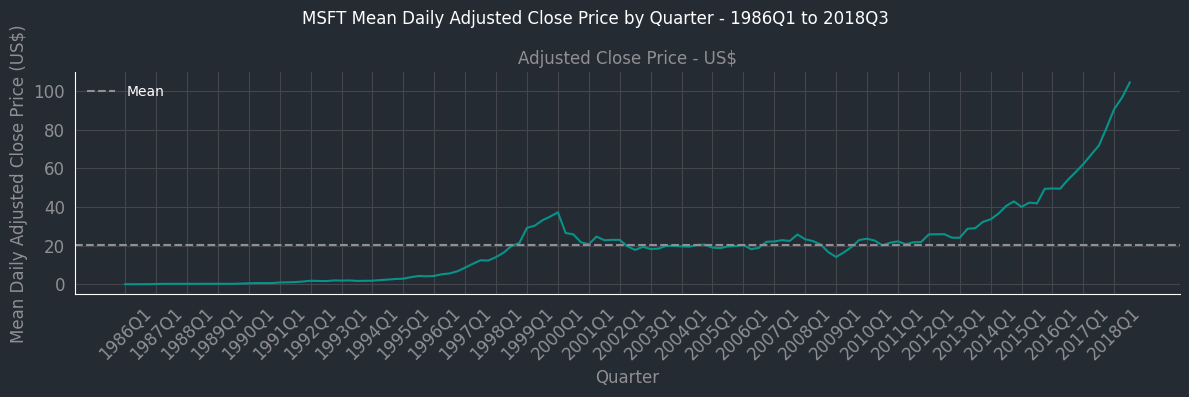

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
title = plt.suptitle("MSFT Mean Daily Adjusted Close Price by Quarter - 1986Q1 to 2018Q3", color=palette["light"])
linecolor = palette["green"]
yaxis = "Adj Close"
ylabel = "Mean Daily Adjusted Close Price (US$)"
title = "Adjusted Close Price - US$"
create_line_plot(ax, meanQ_ac, "Quarter", yaxis, linecolor, xticks, title=title, ylabel=ylabel, ymean=True)
plt.tight_layout()
plt.show()

Three major periods can be observed in the adjusted price data: initial growth from IPO to 1999 Q4; a sharp decline in 2000 Q1 followed by a long plateau to around 2009 Q1, and then a further growth period on to the end of the timeframe at 2018 Q3.

Eyeballing the chart we can see that during the third period, MSFT rose steadily from around USD20 per share in 2009, to over USD100 per share in 2018. No doubt this 5x growth was a welcome development for shareholders, but if we examine a similar time period within the first growth period, from 1990 to 1999 we can see close to 38x growth, from around USD1 up to almost USD38 per share!

For context, the "dotcom boom" saw a general surge in valuations across US technology stocks from the mid-1990s, until the bust took place in March 2000.

We would need access to broader market data to confirm this correlation, but we can safely assume that those events contributed to MSFT's stock performance during that period, as well as the plateau that followed as a result of the subsequent increased weariness towards technology stocks on the part of investors.

Let's drill down on the figures in our dataset for comparison with this visual analysis.

In [ ]:
# Get masks for time periods
start_1986Q1, end_1999Q4 = "1986Q1", "1999Q4"
mask_1986Q1_to_1999Q4 = (meanQ_ac["Quarter"] >= start_1986Q1) & (meanQ_ac["Quarter"] <= end_1999Q4)
start_2000Q1, end_2008Q4 = "2000Q1", "2008Q4"
mask_2000Q1_to_2008Q4 = (meanQ_ac["Quarter"] >= start_2000Q1) & (meanQ_ac["Quarter"] <= end_2008Q4)
start_2009Q1, end_2018Q3 = "2009Q1", "2018Q3"
mask_2009Q1_to_2018Q3 = (meanQ_ac["Quarter"] >= start_2009Q1) & (meanQ_ac["Quarter"] <= end_2018Q3)
start_1990Q1 = "1990Q1"
mask_1990Q1_to_1999Q4 = (meanQ_ac["Quarter"] >= start_1990Q1) & (meanQ_ac["Quarter"] <= end_1999Q4)
# Describe each time period
desc_1986Q1_to_1999Q4 = meanQ_ac.loc[mask_1986Q1_to_1999Q4, "Adj Close"].describe().round(2)
desc_2000Q1_to_2008Q4 = meanQ_ac.loc[mask_2000Q1_to_2008Q4, "Adj Close"].describe().round(2)
desc_2009Q1_to_2018Q3 = meanQ_ac.loc[mask_2009Q1_to_2018Q3, "Adj Close"].describe().round(2)
desc_1990Q1_to_1999Q4 = meanQ_ac.loc[mask_1990Q1_to_1999Q4, "Adj Close"].describe().round(2)
# Combine descriptions
comb_desc = pd.concat(
    [desc_1986Q1_to_1999Q4, desc_2000Q1_to_2008Q4, desc_2009Q1_to_2018Q3, desc_1990Q1_to_1999Q4],
    axis=1,
    keys=["1986Q1 to 1999Q4", "2000Q1 to 2008Q4", "2009Q1 to 2018Q3", "1990Q1 to 1999Q4"]
)

comb_desc

,1986Q1 to 1999Q4,2000Q1 to 2008Q4,2009Q1 to 2018Q3,1990Q1 to 1999Q4
count,56.00,36.00,39.00,40.00
mean,5.65,21.48,40.46,7.82
std,8.93,3.61,23.37,9.78
min,0.07,16.66,14.18,0.50
25%,0.30,19.49,22.84,1.77
50%,1.86,20.49,32.34,2.86
75%,5.35,22.87,49.60,11.07
max,35.09,37.30,104.57,35.09


These statistics roughly correspond with what we observed from the adjusted price chart, but in fact indicate even greater price increases between the boom periods: of USD0.50 to USD35.09 (> 70x) for 1990 Q1 to 1999 Q4, and USD14.18 to USD104.57 (> 7x) for 2009 Q1 to 2018 Q3.

The full growth for the initial period saw over a 501x increase from 1986 Q3 to 1999 Q4, from USD0.07 to USD35.09.

We could have more accurately discerned the true figures had we plotted the data across shorter time periods in the first place; let's do so now for the three main periods discussed.

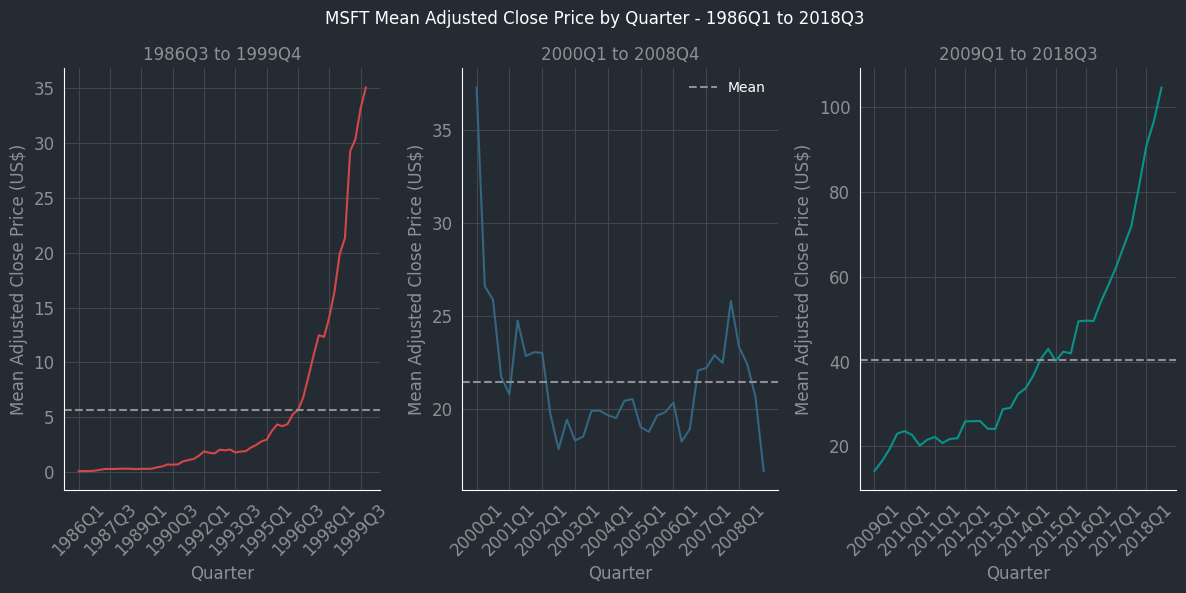

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

title = plt.suptitle("MSFT Mean Adjusted Close Price by Quarter - 1986Q1 to 2018Q3", color=palette["light"])

data_1986Q1_to_1999Q4 = meanQ_ac[mask_1986Q1_to_1999Q4]
data_2000Q1_to_2008Q4 = meanQ_ac[mask_2000Q1_to_2008Q4]
data_2009Q1_to_2018Q3 = meanQ_ac[mask_2009Q1_to_2018Q3]

ax1 = plt.subplot(1, 3, 1)
linecolor = palette["red"]
xticks = data_1986Q1_to_1999Q4["Quarter"].unique()[::6]
yaxis = "Adj Close"
ylabel = "Mean Adjusted Close Price (US$)"
title = "1986Q3 to 1999Q4"
create_line_plot(ax1, data_1986Q1_to_1999Q4, "Quarter", yaxis, linecolor, xticks, legend=False, title=title, ylabel=ylabel, ymean=True)

ax2 = plt.subplot(1, 3, 2)
linecolor = palette["blue"]
xticks = data_2000Q1_to_2008Q4["Quarter"].unique()[::4]
yaxis = "Adj Close"
ylabel = "Mean Adjusted Close Price (US$)"
title = "2000Q1 to 2008Q4"
create_line_plot(ax2, data_2000Q1_to_2008Q4, "Quarter", yaxis, linecolor, xticks, title=title, ylabel=ylabel, ymean=True)

ax3 = plt.subplot(1, 3, 3)
linecolor = palette["green"]
xticks = data_2009Q1_to_2018Q3["Quarter"].unique()[::4]
yaxis = "Adj Close"
ylabel = "Mean Adjusted Close Price (US$)"
title = "2009Q1 to 2018Q3"
create_line_plot(ax3, data_2009Q1_to_2018Q3, "Quarter", yaxis, linecolor, xticks, legend=False, title=title, ylabel=ylabel, ymean=True)

plt.tight_layout()
plt.show()

Now the trends can be observed much more easily across the three time periods.

Note that the increase in mean adjusted close price since 2009 exhibits a strong negative correlation with the reduction in trading volume seen in the first chart.

The relationship is plotted in the chart below.

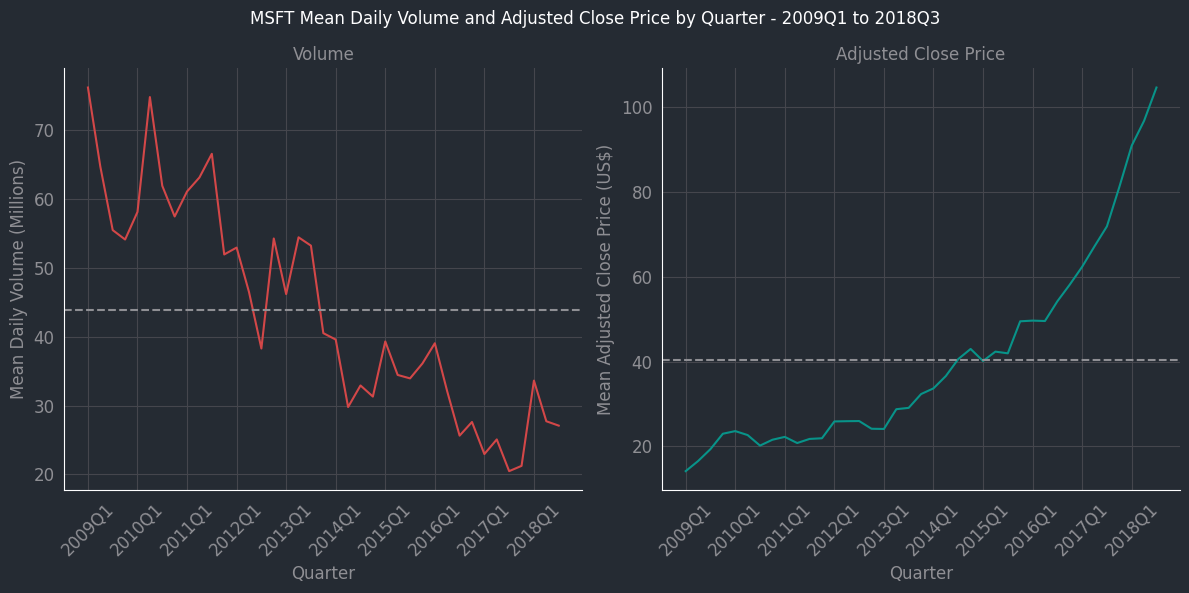

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

title = plt.suptitle("MSFT Mean Daily Volume and Adjusted Close Price by Quarter - 2009Q1 to 2018Q3", color=palette["light"])

# Apply matching mask for volume data
start_2009Q1, end_2018Q3 = "2009Q1", "2018Q3"
vol_mask_2009Q1_to_2018Q3 = (meanQ_vols["Quarter"] >= start_2009Q1) & (meanQ_vols["Quarter"] <= end_2018Q3)
vol_2009Q1_to_2018Q3 = meanQ_vols[vol_mask_2009Q1_to_2018Q3]
ac_2009Q1_to_2018Q3 = meanQ_ac[mask_2009Q1_to_2018Q3]

ax1 = plt.subplot(1, 2, 1)
linecolor = palette["red"]
xticks = vol_2009Q1_to_2018Q3["Quarter"].unique()[::4]
yaxis = "Volume"
ylabel = "Mean Daily Volume (Millions)"
title = "Volume"
create_line_plot(ax1, vol_2009Q1_to_2018Q3, "Quarter", yaxis, linecolor, xticks, legend=False, title=title, ylabel=ylabel, ymean=True)

ax2 = plt.subplot(1, 2, 2)
linecolor = palette["green"]
xticks = ac_2009Q1_to_2018Q3["Quarter"].unique()[::4]
yaxis = "Adj Close"
ylabel = "Mean Adjusted Close Price (US$)"
title = "Adjusted Close Price"
create_line_plot(ax2, ac_2009Q1_to_2018Q3, "Quarter", yaxis, linecolor, xticks, legend=False, title=title, ylabel=ylabel, ymean=True)

plt.tight_layout()


Let's get the figure for the correlation:

In [ ]:
vol_ac_09Q1_18Q3 = pd.merge(ac_2009Q1_to_2018Q3, vol_2009Q1_to_2018Q3, on="Quarter")
correlation = vol_ac_09Q1_18Q3["Adj Close"].corr(vol_ac_09Q1_18Q3["Volume"])
print(f"MSFT Adj Close & Volume had a {correlation:.2f} correlation between 2009 Q1 and 2018 Q3")

MSFT Adj Close & Volume had a -0.79 correlation between 2009 Q1 and 2018 Q3


Clearly a strong negative correlation.

The trend observed implies that the reduction in trading volume is not a result of reduced demand for MSFT shares. The basic economic principle of supply and demand appears to be at play here: all things equal, fewer shares being put up for sale by existing holders should drive up the price at a given demand level. Furthermore, note that this effect could result from either of the theories suggested above - share buybacks by Microsoft, increased institutional ownership, or a combination of the two.

More insight can be coaxed out by examining relative changes over time. To do this, we can make use of the change columns we introduced during the processing stage.

Here is the dataframe we created earlier:

In [ ]:
df_new.head()

,Date,Adj Close,Adj Close %Δ,Volume,Volume %Δ,Quarter,Year
0,1986-03-13,0.071132,NaN,1031788800,NaN,1986Q1,1986
1,1986-03-14,0.073673,0.035722,308160000,-0.701334,1986Q1,1986
2,1986-03-17,0.074943,0.017238,133171200,-0.567850,1986Q1,1986
3,1986-03-18,0.073038,-0.025419,67766400,-0.491133,1986Q1,1986
4,1986-03-19,0.071768,-0.017388,47894400,-0.293243,1986Q1,1986


We noted earlier that the dotcom bust was a key juncture in this time series; using our change data we can hone in on that event for more detail.

In [ ]:
start, end = "2000-03-01", "2000-04-30"
dotcom_mask = (df_new["Date"] >= start) & (df_new["Date"] <= end)
dotcom_df = df_new[dotcom_mask].reset_index()
dotcom_df["Date"] = dotcom_df["Date"].astype(str)
dotcom_df.head()

,index,Date,Adj Close,Adj Close %Δ,Volume,Volume %Δ,Quarter,Year
0,3530,2000-03-01,33.221401,0.016085,106889800,0.829133,2000Q1,2000
1,3531,2000-03-02,34.158817,0.028217,106932600,0.000400,2000Q1,2000
2,3532,2000-03-03,35.164848,0.029452,101435200,-0.051410,2000Q1,2000
3,3533,2000-03-06,33.152794,-0.057218,93609400,-0.077151,2000Q1,2000
4,3534,2000-03-07,33.975906,0.024828,135061000,0.442815,2000Q1,2000


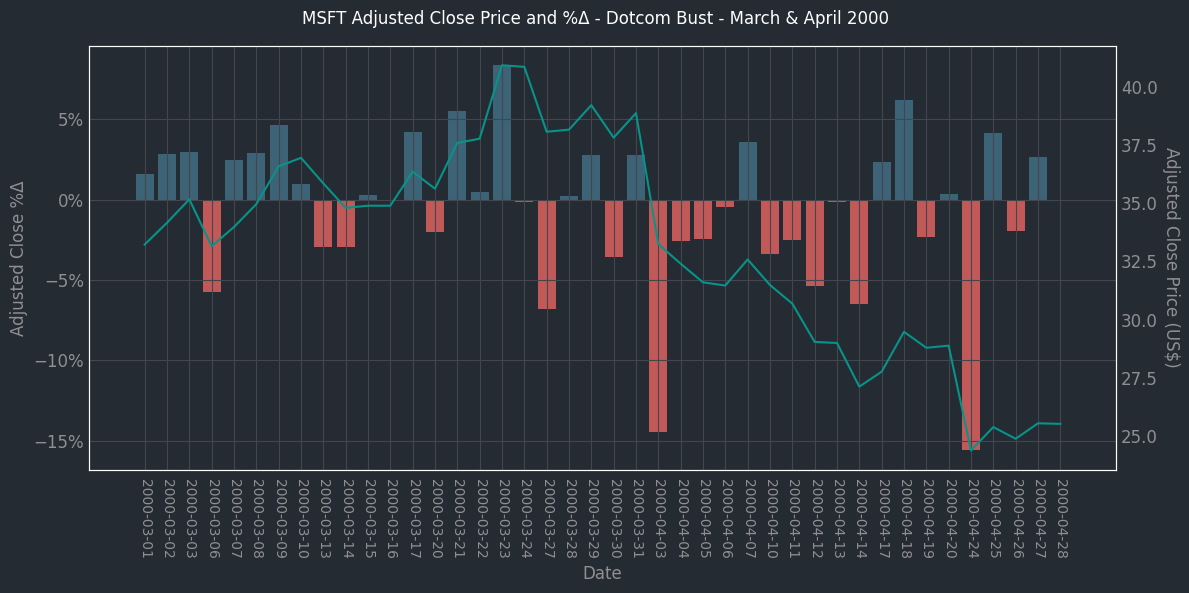

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
title = plt.suptitle("MSFT Adjusted Close Price and %Δ - Dotcom Bust - March & April 2000", color=palette["light"])

colors = list(np.where(dotcom_df["Adj Close %Δ"] >= 0, palette["blue"], palette["red"]))
sns.barplot(ax=ax1, data=dotcom_df[["Date", "Adj Close %Δ"]], x="Date", y="Adj Close %Δ", hue="Date", legend=False, palette=colors)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

xticks = dotcom_df["Date"]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, fontsize=10, color=palette["stone"], rotation=270, ha="center")
plt.xlabel("Date", fontsize=12, color=palette["stone"])
plt.ylabel("Adjusted Close %Δ", fontsize=12, color=palette["stone"])
plt.yticks(fontsize=12, color=palette["stone"])
plt.tick_params(bottom=False)
ax1.tick_params(axis="y", length=0)

ax2 = ax1.twinx()
linecolor = palette["green"]
ax2.plot(dotcom_df["Date"], dotcom_df["Adj Close"], color=linecolor)
ax2.set_ylabel("Adjusted Close Price (US$)", fontsize=12, color=palette["stone"], rotation=270, labelpad=16)
plt.yticks(fontsize=12, color=palette["stone"])
ax2.tick_params(axis="y", length=0)

ax1.grid()
plt.tight_layout()
plt.show()

Plotting both the percentage change in adjusted close price (on the left-hand y-axis) and the actual price change (right-hand y-axis), we can the cumulative effect of the changes over time.

### Conclusion

This has been a demonstration of some of the methods available to clean and process raw data, undertake basic feature engineering, and conduct intial exploratory data analysis for a dataset.

More could be done to expand on the above, including plotting candlestick OHLC (open, high, low, close) data for more granular trade analysis, or exploring indicators for use in predictions, or bringing in outside data on general market performance or comparable stocks in the technology sector.